In [10]:
# ==============================
# 1. Import libraries
# ==============================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, auc, precision_recall_curve)

In [11]:
# ==============================
# 2. Load dataset
# ==============================
# Adjust path if needed:
df = pd.read_csv(r"C:\Users\namis\Downloads\NLP Assignmment 21sept2025\archive\spam.csv", encoding='latin-1')
# ^ Note the 'r' prefix and removal of the leading slash

# Keep only needed columns
df = df[['v1','v2']].rename(columns={'v1':'label','v2':'message'})

In [12]:
# ==============================
# 3. Preprocess text
# ==============================
stop_words = ENGLISH_STOP_WORDS

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df['cleaned'] = df['message'].apply(clean_text)

In [14]:
# ==============================
# 4. TF-IDF Features
# ==============================
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['label'].map({'ham':0,'spam':1})

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# ==============================
# 5. Train Models
# ==============================
nb = MultinomialNB()
nb.fit(X_train, y_train)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

models = {'Naive Bayes': nb, 'Logistic Regression': logreg}


Naive Bayes Evaluation:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



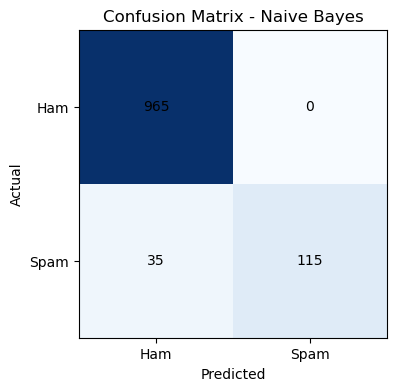


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.97      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.96      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115



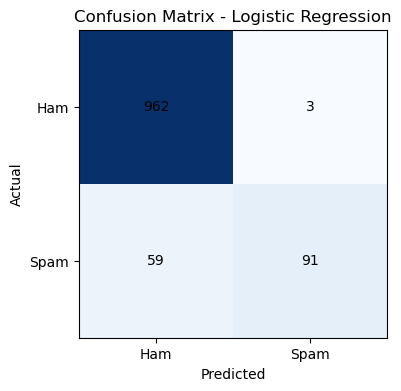

In [16]:
# ==============================
# 6. Evaluation: Confusion Matrices
# ==============================
for name, model in models.items():
    print(f"\n{name} Evaluation:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    plt.imshow(cm, cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0,1],['Ham','Spam'])
    plt.yticks([0,1],['Ham','Spam'])
    for i in range(2):
        for j in range(2):
            plt.text(j,i,cm[i,j],ha='center',va='center')
    plt.show()

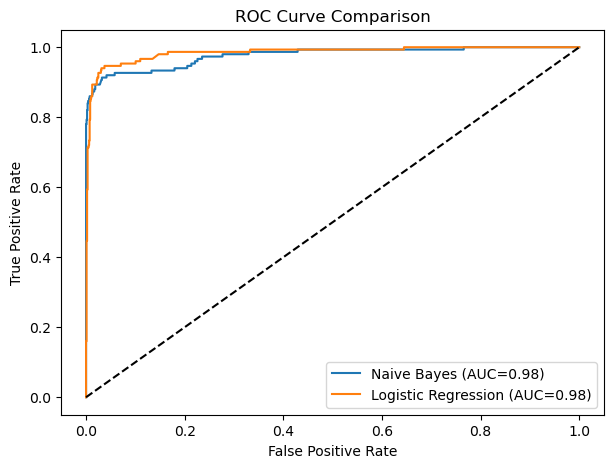

In [17]:
# ==============================
# 7. ROC Curve Comparison
# ==============================
plt.figure(figsize=(7,5))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

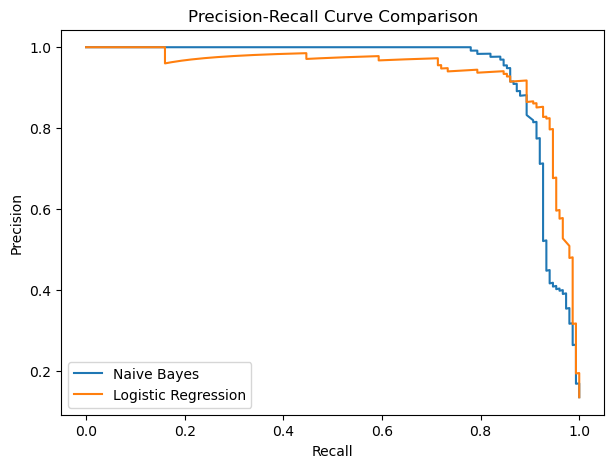

In [18]:
# ==============================
# 8. Precision/Recall Curve Comparison
# ==============================
plt.figure(figsize=(7,5))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, label=name)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()